In [1]:
# 토치 식구들
import torch
import torch.nn as nn
import torch.nn.functional as F

# 넘파이는 가족이다
import numpy as np

# for문 진행현황을 멋있게 보는 방법
from tqdm import tqdm

# loss 추이 등 그래프를 찍어볼 때 사용할 것이다.
import matplotlib.pyplot as plt

In [2]:
# Hyperparameters
# 해당 예시 코드의 경우 사용한 데이터 예시가 Sigmoid로 끼워넣기에 빡빡한 모양새를 가지고 있어서
# LR을 좀 작게 설정하고 num_epoch을 늘렸다
num_epochs = 20000
lr = 0.003

In [3]:
# GPU 체크
torch.cuda.is_available()

True

In [4]:
# GPU 있으면 GPU 씁시다
device = torch.device('cuda' if torch.cuda.is_available()==True else 'cpu')

In [5]:
# 데이터
# (종합 점수, 합격 여부) -> 0이면 불합격, 1이면 합격
# (15, 0 ), (24, 0), (57, 0), (78, 1) (90, 1), (114, 1)

x = [15, 24, 57, 78, 90, 114]
y = [0, 0, 0, 1, 1, 1]

# 데이터 Tensor화 및 gpu에 할당
train_x = torch.Tensor(x).to(device)
train_y = torch.Tensor(y).to(device)

# (n, 1) 꼴로 바꿔주자 
train_x = torch.reshape(train_x, (len(train_x), 1))
train_y = torch.reshape(train_y, (len(train_y), 1))

In [6]:
# 주어진 데이터와 최대로 비슷한 상관 관계를 가장 잘 나타내는 y=Wx+b에 sigmoid를 씌운 형태의 함수를 추론하는 과정


class Logistic_Model(nn.Module):
    def __init__(self):
        super(Logistic_Model, self).__init__()
        
        # Hidden Layer 없이 크기 1 Input 받아서 크기 1 Output을 출력
        self.layer1 = nn.Sequential(nn.Linear(1,1),
                                     nn.Sigmoid())
        

    def forward(self, x):
        out = self.layer1(x)
        return out

In [7]:
# Loss Graph를 위해 epoch마다 cost를 append할 빈 리스트
Loss_list = []

In [8]:
# 모델 정의 및 gpu에 할당
model = Logistic_Model().to(device)

In [9]:
# Loss 함수 정의
criterion = nn.BCELoss().to(device)

In [10]:
# Optimizer 정의
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [11]:
# tqdm으로 progress 확인을 위해 tqdm 객체 생성
num_e = tqdm(range(num_epochs))

  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]

In [12]:
for epoch in num_e:
    out_ = model(train_x)

#     cost = criterion(train_y, out).to(device)
    cost = F.binary_cross_entropy(out_, train_y).to(device)
    
    Loss_list.append(cost.item())

    # 학습
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 1000 == 999:
    # 10번마다 로그 출력
      print(out_)
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch+1, num_epochs, cost.item()
      ))


  6%|████▊                                                                      | 1272/20000 [00:02<00:14, 1331.42it/s]

tensor([[0.5939],
        [0.6672],
        [0.8644],
        [0.9301],
        [0.9530],
        [0.9792]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 1000/20000 Cost: 0.690145


 12%|████████▊                                                                  | 2335/20000 [00:02<00:08, 1966.90it/s]

tensor([[0.4872],
        [0.5812],
        [0.8478],
        [0.9310],
        [0.9572],
        [0.9840]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 2000/20000 Cost: 0.592007


 17%|████████████▊                                                              | 3401/20000 [00:03<00:08, 2067.71it/s]

tensor([[0.3840],
        [0.4812],
        [0.7992],
        [0.9096],
        [0.9447],
        [0.9801]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 3000/20000 Cost: 0.486336


 21%|███████████████▉                                                           | 4258/20000 [00:03<00:07, 2104.09it/s]

tensor([[0.3016],
        [0.3932],
        [0.7416],
        [0.8809],
        [0.9270],
        [0.9740]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 4000/20000 Cost: 0.406736


 27%|███████████████████▉                                                       | 5332/20000 [00:04<00:07, 2094.44it/s]

tensor([[0.2369],
        [0.3172],
        [0.6706],
        [0.8391],
        [0.8992],
        [0.9632]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 5000/20000 Cost: 0.346958


 32%|███████████████████████▉                                                   | 6388/20000 [00:04<00:06, 2088.50it/s]

tensor([[0.1834],
        [0.2467],
        [0.5663],
        [0.7590],
        [0.8389],
        [0.9344]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 6000/20000 Cost: 0.306789


 36%|███████████████████████████▏                                               | 7248/20000 [00:04<00:05, 2134.10it/s]

tensor([[0.1555],
        [0.2167],
        [0.5523],
        [0.7616],
        [0.8462],
        [0.9422]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 7000/20000 Cost: 0.285973


 42%|███████████████████████████████▏                                           | 8307/20000 [00:05<00:05, 2090.38it/s]

tensor([[0.1333],
        [0.1921],
        [0.5403],
        [0.7646],
        [0.8531],
        [0.9489]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 8000/20000 Cost: 0.268876


 47%|███████████████████████████████████▏                                       | 9389/20000 [00:05<00:04, 2158.60it/s]

tensor([[0.1154],
        [0.1715],
        [0.5292],
        [0.7674],
        [0.8592],
        [0.9543]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 9000/20000 Cost: 0.254570


 51%|█████████████████████████████████████▉                                    | 10252/20000 [00:06<00:04, 2118.98it/s]

tensor([[0.1009],
        [0.1541],
        [0.5191],
        [0.7700],
        [0.8647],
        [0.9589]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 10000/20000 Cost: 0.242402


 57%|█████████████████████████████████████████▉                                | 11319/20000 [00:06<00:04, 2121.67it/s]

tensor([[0.0888],
        [0.1393],
        [0.5096],
        [0.7724],
        [0.8697],
        [0.9627]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 11000/20000 Cost: 0.231907


 62%|█████████████████████████████████████████████▌                            | 12309/20000 [00:07<00:04, 1850.58it/s]

tensor([[0.0787],
        [0.1265],
        [0.5009],
        [0.7747],
        [0.8742],
        [0.9660]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 12000/20000 Cost: 0.222742


 66%|████████████████████████████████████████████████▊                         | 13204/20000 [00:07<00:04, 1615.33it/s]

tensor([[0.0702],
        [0.1155],
        [0.4926],
        [0.7768],
        [0.8784],
        [0.9688]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 13000/20000 Cost: 0.214654


 71%|████████████████████████████████████████████████████▋                     | 14244/20000 [00:08<00:03, 1667.35it/s]

tensor([[0.0630],
        [0.1058],
        [0.4849],
        [0.7789],
        [0.8822],
        [0.9713]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 14000/20000 Cost: 0.207447


 76%|████████████████████████████████████████████████████████▌                 | 15281/20000 [00:09<00:02, 1658.02it/s]

tensor([[0.0568],
        [0.0973],
        [0.4776],
        [0.7808],
        [0.8857],
        [0.9735]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 15000/20000 Cost: 0.200973


 81%|███████████████████████████████████████████████████████████▊              | 16173/20000 [00:09<00:02, 1762.54it/s]

tensor([[0.0514],
        [0.0898],
        [0.4706],
        [0.7826],
        [0.8890],
        [0.9754]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 16000/20000 Cost: 0.195114


 86%|███████████████████████████████████████████████████████████████▋          | 17217/20000 [00:10<00:01, 1706.89it/s]

tensor([[0.0467],
        [0.0832],
        [0.4640],
        [0.7844],
        [0.8920],
        [0.9771]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 17000/20000 Cost: 0.189777


 91%|███████████████████████████████████████████████████████████████████▍      | 18219/20000 [00:10<00:01, 1611.03it/s]

tensor([[0.0426],
        [0.0772],
        [0.4577],
        [0.7861],
        [0.8949],
        [0.9786]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 18000/20000 Cost: 0.184888


 96%|███████████████████████████████████████████████████████████████████████▏  | 19254/20000 [00:11<00:00, 1607.51it/s]

tensor([[0.0390],
        [0.0719],
        [0.4517],
        [0.7877],
        [0.8976],
        [0.9800]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 19000/20000 Cost: 0.180385


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:12<00:00, 1661.08it/s]

tensor([[0.0359],
        [0.0671],
        [0.4460],
        [0.7892],
        [0.9001],
        [0.9812]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 20000/20000 Cost: 0.176217


In [13]:
num_e.close()

In [14]:
# Weight 확인
for weight in model.parameters():
    print(weight)

Parameter containing:
tensor([[0.0732]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-4.3899], device='cuda:0', requires_grad=True)


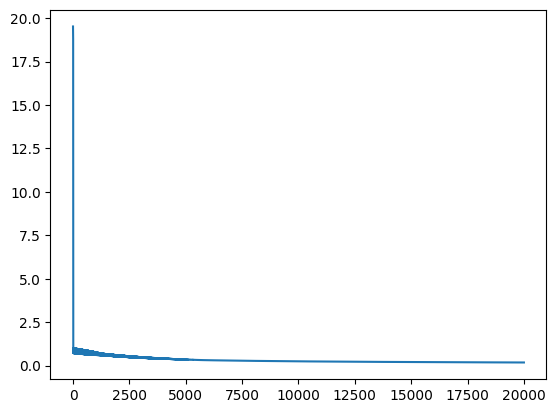

In [15]:
# loss graph 출력

plt.plot(Loss_list[1:])
plt.show()

## 10000번째 에폭을 보면 3번째 인덱스(out_[2])는 0.5가 넘는 것을 볼 수 있다.
tensor([[0.1009],
        [0.1541],
        [0.5191],
        [0.7700],
        [0.8647],
        [0.9589]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Epoch 10000/20000 Cost: 0.242402
    
여기서 Loss는 거의 바로 수렴한 것을 볼 수 있었지만 
꼭 Sigmoid에 끼워서 맞추려면 10000보다는 많은 에폭이 필요하다는 것을 알 수 있다.
Overfitting이 될 수 있음

In [16]:
# 테스트 데이터 넣어보기
model.eval()
a = np.array([[66]]) # model에 넣어줄 때는 (n, 1)꼴로 받아야하기 때문에
result = model(torch.Tensor(a).to(device)).item()
if result >= 0.5:
    result_ = 1
elif result < 0.5:
    result_ = 0
else:
    print("ERROR")
    
print("If", a[0, 0], "is the input, the output is:", result_)

If 66 is the input, the output is: 1


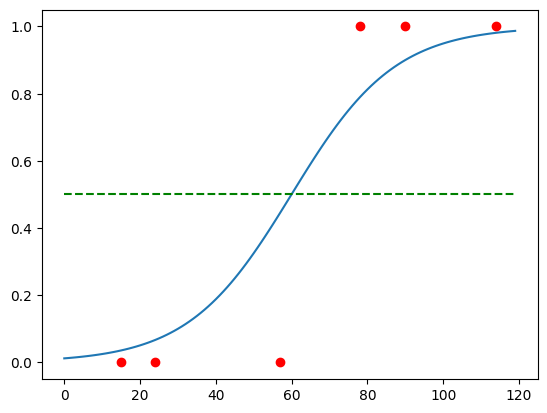

In [23]:
# y = Wx + b에 Sigmoid를 적용한 그래프 그려보기

# y = Wx + b에 Sigmoid를 적용한 그래프 그려보기

lista = list(range(0,120,1))
lista = np.array(lista)
lista = np.reshape(lista, (len(lista), 1))

plt.plot(lista, model(torch.Tensor(lista).to(device)).detach().cpu().numpy())
plt.plot(x, y, 'ro')
plt.plot(lista, 1/2*np.ones(len(lista)), 'g--')
plt.show()